<a href="https://colab.research.google.com/github/anujang/monopole_noise/blob/main/monopole_statics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
2

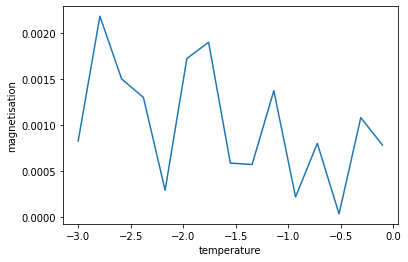

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 16 19:18:29 2021

@author: Anujan
"""


import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from numpy.random import rand

# system at infinite temprature - max randomness
def state(N,M):
    spins = npr.randint(0,2, (N,M)) * 2 - 1  # produces number (-1,1) randomly
    return spins
    
# Dictionary of possible configurations
# s=1 is in ; s=-1 is out
# ground state
g_s1 = np.array([(1,1),
                 (-1,-1)]) ; g_s2 = g_s1*-1

g_s3 = np.array([(1,-1),
                 (1,-1)]) ; g_s4 = g_s3*-1

g_s5 = np.array([(1,-1),
                 (-1,1)]) ; g_s6 = g_s5*-1

# first excited state
e_s1 = np.array([(1,-1),
                 (1,1)]) ; e_s2 = e_s1*-1

e_s3 = np.array([(-1,1),
                 (1,1)]) ; e_s4 = e_s3*-1

e_s5 = np.array([(1,1),
                 (-1,1)]) ; e_s6 = e_s5*-1

e_s7 = np.array([(1,1),
                 (1,-1)]) ; e_s8 = e_s7*-1

e_s9 = np.array([(1,1),
                 (1,1)]) ; e_s10 = e_s9*-1    # all in all out - e_s9/e_s10

# to split larger matrices into 2x2 ones to identify each one from dictionary
def split(spins):
    n,m = np.shape(spins)
    num = int((n-(n%2))/2)  # works out how many 2x2 lattices in big lattice
    arr = np.arange(0,n,2)
    iso = np.zeros((num**2, 2, 2)) # empty array to put in 2x2 matrices, each around a lattice point
    ind=0
    for i in range(len(arr)):
        for j in range(len(arr)):
            indx = int(arr[i])
            indy = int(arr[j])
            iso[ind] = np.array([(spins[indx,indy], spins[indx,(indy+1)%n]), 
                          (spins[(indx+1)%n,indy], spins[(indx+1)%n,(indy+1)%n])])
            ind+=1
    return iso

def define(spins):
    gs1,gs2,gs3,gs4,gs5,gs6,es1,es2,es3,es4,es5,es6,es7,es8,es9,es10=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    for i in range(len(spins)):
        if np.all(spins[i] == g_s1):
            gs1+=1
        if np.all(spins[i] == g_s2):
            gs2+=1
        if np.all(spins[i] == g_s3):
            gs3+=1
        if np.all(spins[i] == g_s4):
            gs4+=1
        if np.all(spins[i] == g_s5):
            gs5+=1
        if np.all(spins[i] == g_s6):
            gs6+=1            
        if np.all(spins[i] == e_s1):
            es1+=1
        if np.all(spins[i] == e_s2):
            es2+=1
        if np.all(spins[i] == e_s3):
            es3+=1
        if np.all(spins[i] == e_s4):
            es4+=1
        if np.all(spins[i] == e_s5):
            es5+=1
        if np.all(spins[i] == e_s6):
            es6+=1
        if np.all(spins[i] == e_s7):
            es7+=1
        if np.all(spins[i] == e_s8):
            es8+=1
        if np.all(spins[i] == e_s9):    # vertex d
            es9+=1
        if np.all(spins[i] == e_s10):
            es10+=1
    return gs1,gs2,gs3,gs4,gs5,gs6,es1,es2,es3,es4,es5,es6,es7,es8,es9,es10

    
def energy(spins,te):
    c = spins
    E = 0
    #te=.2
    #for i in range(len(c)):
    if c[0]>0 or c[1]>0:   # states gs1 to gs4 have energy -2J2
        E+=(c[0]+c[1])*((np.sqrt(2)-1)/(np.sqrt(2)-0.5))#
    if c[2]>0 or c[3]>0:
        E+=(c[2]+c[3])*(-te*np.log(0.5))
        #print(E)
    if c[4]>0 or c[5]>0:                       # states gs5 and g6 have energy -4J1 + 2J2
        E+=(c[4]+c[5])*0#((-4*J1)+(2*J2))
        #print(E)
    if c[14]>0 or c[15]>0:                     # states es9 and es10 have energy 4J1 + 2J2
        E+=(c[14]+c[15])*(-te*np.log(1e-5))#((4*np.sqrt(2))/(2*np.sqrt(2) - 1))
        #print(E)
    if c[6]>0 or c[7]>0 or c[8]>0 or c[9]>0 or c[10]>0 or c[11]>0 or c[12]>0 or c[13]>0:
        E+=(c[6]+c[7]+c[8]+c[9]+c[10]+c[11]+c[12]+c[13])*(-te*np.log(1e-5))#*1
    return E
    
# import time
# timenow = time.time()
# a = state(2,2)
# b = split(a)
# c = define(b, len(a), len(a))
# d = energy(define,len(a), len(a))

# print(d)

#print("the energy in the system is", d, "J")
#timeend = time.time()
#print(timeend-timenow)


N=4

def initialstate(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state



def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config



def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting



def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag

import time
t1 = time.time()



init_state = state(4,4)
beta = 1

def NN_mag(spins,beta):
    N=len(init_state)
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  init_state[a, b]
                te = 1/(beta)
                if a%2 == 0 and b%2 == 0:     # top left of 2x2
                    TL = np.array([[init_state[a,b],init_state[a,(b+1)%2]],[init_state[(a+1)%2,b],init_state[(a+1)%2,(b+1)%2]]]) # the 2x2 array within which the chosen point resides
                    
                    # if the TL point is chosen, the corresponding vertex where the chosen point is its BR point
                    BR_c = np.array([[init_state[(a-1)%2,(b-1)%2],init_state[(a-1)%2,b]],[init_state[a,(b-1)%2],init_state[a,b]]])
                    
                    
                    energy_before = energy(define(split(TL)),te) + energy(define(split(BR_c)),te)
                    
                    temp_TL = TL
                    temp_BR_c = BR_c
                    temp_s = s
                    temp_TL[0,0] = -temp_s
                    temp_BR_c[1,1] = -temp_s
                    energy_after = energy(define(split(temp_TL)),te) + energy(define(split(temp_BR_c)),te)

                    energy_change = energy_after - energy_before
                    
                    cost = (energy_change)
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    TL[0,0] = s
                    BR_c[1,1] = s
                    
                    
                    #print("change in energy:", energy_after - energy_before)
    
                    #print("before",calcMag(init_state))
                    init_state[a,b] = TL[0,0]
                    init_state[a,(b+1)%2] = TL[0,1]
                    init_state[(a+1)%2,b] = TL[1,0]
                    init_state[(a+1)%2,(b+1)%2] = TL[1,1]

                    init_state[(a-1)%2,(b-1)%2] = BR_c[0,0]
                    init_state[(a-1)%2,b] = BR_c[0,1]
                    init_state[a,(b-1)%2] = BR_c[1,0]
                    init_state[a,b] = BR_c[1,1]
                    #print("after",calcMag(init_state))
    
                    
                elif a%2 == 0 and b%2 == 1:   # top right of 2x2
                    TR = np.array([[init_state[a,(b-1)%2],init_state[a,b]],[init_state[(a+1)%2,(b-1)%2],init_state[(a+1)%2,b]]])
                    
                    # if the TR point is chosen, the corresponding vertex where the chosen point is its BL point
                    BL_c = np.array([[init_state[(a-1)%2,b],init_state[(a-1)%2,(b+1)%2]],[init_state[a,b],init_state[a,(b+1)%2]]])
                   
                    energy_before = energy(define(split(TR)),te) + energy(define(split(BL_c)),te)
                    
                    temp_TR = TR
                    temp_BL_c = BL_c
                    temp_s = s
                    temp_TR[0,1] = -temp_s
                    temp_BL_c[1,0] = -temp_s
                    energy_after = energy(define(split(temp_TR)),te) + energy(define(split(temp_BL_c)),te)

                    energy_change = energy_after - energy_before
                    
                    cost = (energy_change)
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    TR[0,1] = s
                    BL_c[1,0] = s
                    
                    #print("change in energy:", energy_after - energy_before)
    
                    #print("before",calcMag(init_state))
                    init_state[a,(b-1)%2] = TR[0,0]
                    init_state[a,b] = TR[0,1]
                    init_state[(a+1)%2,(b-1)%2] = TR[1,0]
                    init_state[(a+1)%2,b] = TR[1,1]
                    
                    init_state[(a-1)%2,b] = BL_c[0,0]
                    init_state[(a-1)%2,(b+1)%2] = BL_c[0,1]
                    init_state[a,b] = BL_c[1,0]
                    init_state[a,(b+1)%2] = BL_c[1,1]
                    #print("after",calcMag(init_state))
    
                    
                    
    
    
                elif a%2 == 1 and b%2 == 0:   # bottom left of 2x2
                    BL = np.array([[init_state[(a-1)%2,b],init_state[(a-1)%2,b+1]],[init_state[a,b],init_state[a,(b+1)%2]]])
                    
                    # if the BL point is chosen, the corresponding vertex where the chosen point is its TR point
                    TR_c = np.array([[init_state[a,(b-1)%2],init_state[a,b]],[init_state[(a+1)%2,(b-1)%2],init_state[(a+1)%2,b]]])
                    
                    energy_before = energy(define(split(BL)),te) + energy(define(split(TR_c)),te)
                    
                    temp_BL = BL
                    temp_TR_c = TR_c
                    temp_s = s
                    temp_BL[1,0] = -temp_s
                    temp_TR_c[0,1] = -temp_s
                    energy_after = energy(define(split(temp_BL)),te) + energy(define(split(temp_TR_c)),te)

                    energy_change = energy_after - energy_before
                    
                    cost = (energy_change)
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    BL[1,0] = s
                    TR_c[0,1] = s
                    
                    #print("change in energy:", energy_after - energy_before)
                    
                   
                    #print("before",calcMag(init_state))
                    init_state[a-1,b] = BL[0,0]
                    init_state[a-1,b+1] = BL[0,1]
                    init_state[a,b] = BL[1,0]
                    init_state[a,b+1] = BL[1,1]
                    
                    init_state[a,(b-1)%2] = TR_c[0,0]
                    init_state[a,b]  = TR_c[0,1]
                    init_state[(a+1)%2,(b-1)%2] = TR_c[1,0]
                    init_state[(a+1)%2,b] = TR_c[1,1]
                   # print("after",calcMag(init_state))
                   
                    
                elif a%2 == 1 and b%2 == 1:   # bottom right of 2x2
                    BR = np.array([[init_state[(a-1)%2,(b-1)%2],init_state[(a-1)%2,b]],[init_state[a,(b-1)%2],init_state[a,b]]])
                    
                    # if the BR point is chosen, the corresponding vertex where the chosen point is its TL point
                    TL_c =  np.array([[init_state[a,b],init_state[a,(b+1)%2]],[init_state[(a+1)%2,b],init_state[(a+1)%2,(b+1)%2]]])
                    
                    energy_before = energy(define(split(BR)),te) + energy(define(split(TL_c)),te)
                    
                    temp_BR = BR
                    temp_TL_c = TL_c
                    temp_s = s
                    temp_BR[1,1] = -temp_s
                    temp_TL_c[0,0] = -temp_s
                    energy_after = energy(define(split(temp_BR)),te) + energy(define(split(temp_TL_c)),te)

                    energy_change = energy_after - energy_before
                    
                    cost = (energy_change)
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    BR[1,1] = s
                    TL_c[0,0] = s
                    
                    #print("change in energy:", energy_after - energy_before)
                    
                    
                   # print("before",calcMag(init_state))
                    init_state[(a-1)%2,(b-1)%2] = BR[0,0]
                    init_state[(a-1)%2,b] = BR[0,1]
                    init_state[a,(b-1)%2] = BR[1,0]
                    init_state[a,b] = BR[1,1]
                    
                    init_state[a,b] = TL_c[0,0]
                    init_state[a,(b+1)%2] = TL_c[0,1]
                    init_state[(a+1)%2,b] = TL_c[1,0]
                    init_state[(a+1)%2,(b+1)%2] = TL_c[1,1]
                   # print("after",calcMag(init_state))
       # mags = calcMag(init_state)
    return init_state


import time

nt = 15
L = 10
eqSteps = 100
mcSteps = 500


a_w = np.linspace(1.2, 2.4, nt)
#a_w = np.linspace(0.1, 1, nt)

e1 = ((np.sqrt(2)-1)/(np.sqrt(2)-0.5))

#T = np.linspace(90*10**100,100*10**100, nt)
T = np.linspace(0. 1, 3, nt)*-1

#T = (-e1/(np.log(a_w)))
beta = 1/T
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)


repeats = 100

g = np.zeros([repeats,nt])
N=4
n1=1.0/(mcSteps*N**2)
ti = time.time()

for rep in range(0,repeats):
    init_state = state(N,N)
    M = 0
    for tt in range(nt):
        print(rep)
        
        for i in range(eqSteps):
            #equil = NN_mag(init_state,beta[tt])
            NN_mag(init_state,beta[tt])
        
        #equil_mags = NN_mag(init_state,beta[tt])
        
        for i in range(mcSteps):
            NN_mag(init_state,beta[tt])
            mags=calcMag(init_state)

            M=M+mags
        g[rep,tt] = M*n1
      
      #  mags=NN_mag(init_state,beta[tt])
      #  print(mags)
      #  print(calcMag(mags))

      #  g[rep,tt] = calcMag(mags)/(len(init_state)**2)
          
#plt.plot(a_w,abs(g))
        
avg = sum(g)/(repeats)
plt.plot(T, np.abs(avg))  
plt.xlabel("temperature")
plt.ylabel("magnetisation")

t2 = time.time()
print(t2-t1)
# print values of cost - when beta is big, ie temp is small, should not be flipping spins?